## How well do jobs and skills pay for Data Analysts in the UK?

### Methodology

1. Evaluate median salary for top 6 data jobs
2. find median salary per skill for Data Analysts
3. visualise the highest skills and most demanded skills

In [1]:
# import libararies
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_UK = df[df['job_country'] == 'United Kingdom'].dropna(subset=['salary_year_avg']).copy()


In [3]:
job_titles = df_UK['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_uk_top6 = df_UK[df_UK['job_title_short'].isin(job_titles)]

In [30]:
job_order = df_uk_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

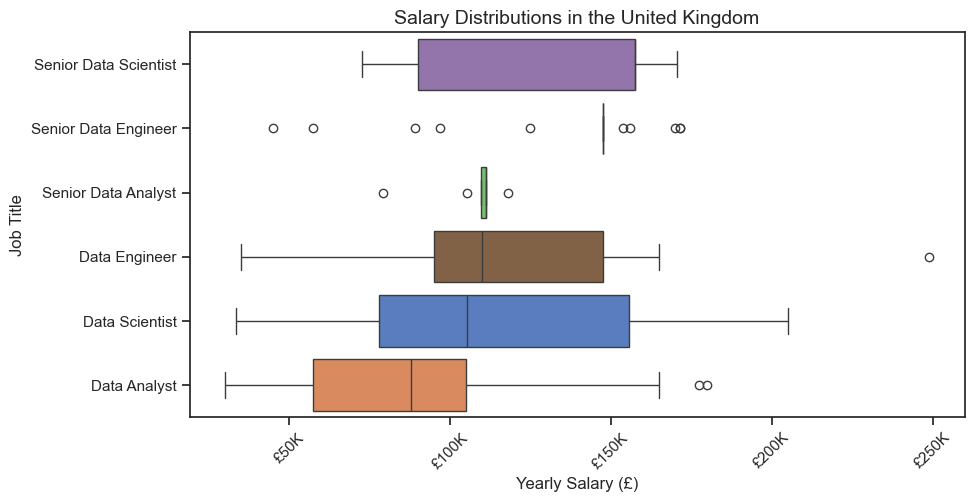

In [32]:
sns.set_theme(style="ticks", palette="muted")
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_uk_top6, x='salary_year_avg', y='job_title_short',order=job_order, hue='job_title_short')

plt.title('Salary Distributions in the United Kingdom', fontsize=14)
plt.xlabel('Yearly Salary (£)', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.xticks(rotation=45)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'£{int(x/1000)}K'))

plt.show()

### Investigate Median Salary vs. skill for Data Analysts

In [49]:
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg'])

In [50]:
df_DA_UK = df_DA_UK.explode('job_skills')

In [52]:

df_DA_UK_grouped = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_UK_top_pay = df_DA_UK_grouped.sort_values(by='median', ascending=False).head(10)

df_DA_UK_skills = df_DA_UK_grouped.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

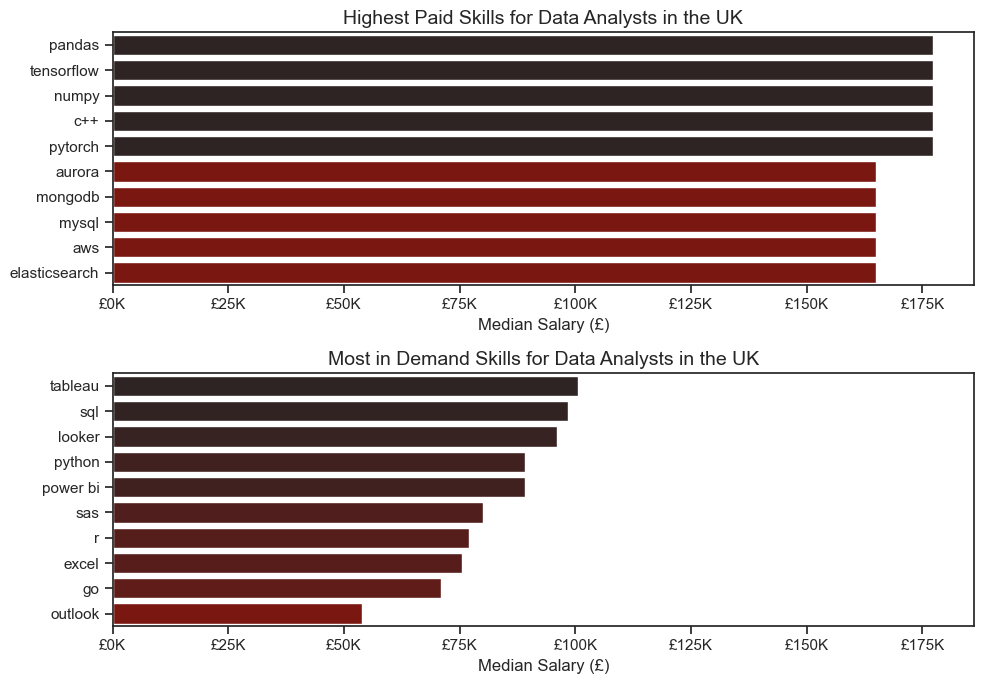

In [67]:
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

sns.barplot(data=df_DA_UK_top_pay, x='median', y=df_DA_UK_top_pay.index, ax=ax[0], hue='median', palette='dark:r_r')
ax[0].set_title('Highest Paid Skills for Data Analysts in the UK', fontsize=14)
ax[0].set_ylabel('')
ax[0].set_xlabel('Median Salary (£)', fontsize=12)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'£{int(x/1000)}K'))
ax[0].legend().remove()

sns.barplot(data=df_DA_UK_skills, x='median', y=df_DA_UK_skills.index, ax=ax[1], hue='median', palette='dark:r_r')
ax[1].set_title('Most in Demand Skills for Data Analysts in the UK', fontsize=14)
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (£)', fontsize=12)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'£{int(x/1000)}K'))
ax[1].legend().remove()

ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()